In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

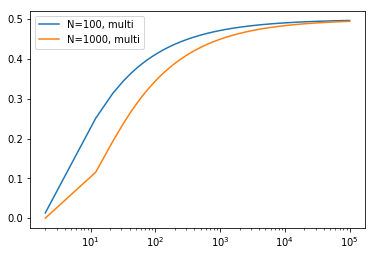

In [6]:
N1 = 100 # number of neurons 
N2=1000
Ms = np.linspace(2,100000,10000)

mean1 = (N1-1)/8 # +-
var1 = (Ms-1)*(N1-1)/32 
mean2 = (N2-1)/8
var2 = (Ms-1)*(N2-1)/32
var3 = var1*np.sqrt(N1)
var4 = var2*np.sqrt(N2)

#print(var)

error_prob = np.zeros((len(Ms),4))

for i in range(len(var1)):
    error_prob[i,0] = norm.cdf(-mean1/np.sqrt(var1[i]) )
    error_prob[i,1] = norm.cdf(-mean2/np.sqrt(var2[i]) )
    error_prob[i,2] = norm.cdf(-mean1/np.sqrt(var3[i]) )
    error_prob[i,3] = norm.cdf(-mean2/np.sqrt(var4[i]) )
#plt.plot(Ms,error_prob[:,0],label = 'N=100')
plt.plot(Ms,error_prob[:,2],label = 'N=100, multi')
#plt.plot(Ms,error_prob[:,1],label = 'N=1000')
plt.plot(Ms,error_prob[:,3],label = 'N=1000, multi')
plt.legend()
plt.xscale('log')
plt.show()

In [3]:
def generate_memories(n,m): # generate the memories
    memory = np.random.binomial(1,0.5,size = (m,n))
    # check that no memories are the same
    unique_rows = np.unique(memory, axis=0)
    if unique_rows.shape[0] < m:
        generate_memories(n,m)
    return memory

In [4]:
def learn_weights(memory,m):
    n= memory.shape[1]
    memory = memory[0:m,:]
    memory = memory - 1/2 
    W = np.matmul (memory.T, memory)  
    for i in range(n):
        W[i,i] = 0
    return W

In [5]:
def flip_bits(r_fb,sigma):
    prob_fb = np.random.binomial(1,sigma,size = len(r_fb))
    for k in range(len(r_fb)):
        if prob_fb[k] == 1:
            if r_fb[k] == 1:
                r_fb[k] =0
            else:
                r_fb[k]=1
    return r_fb

In [6]:
def network_dynamics(W_nd,r_nd,t,sigma=0):
    n = r_nd.shape[0]
    #print('in nd before flip')
    #print(r_nd)
    r_nd =flip_bits(r_nd,sigma)
    #print('in nd after flip')
    #print(r_nd)
    for i in range(t):
        neuron = np.random.randint(n)
        if np.dot(W_nd[neuron,:],r_nd) >= 0:
            r_nd[neuron] = 1
        else:
            r_nd[neuron] = 0
    
    return r_nd

In [7]:
print(flip_bits(np.array([1,1,1,1]),1))

[0 0 0 0]


In [7]:
def test_network(W_tn,memory_tn,m_tn,noise=0):
    t= 3000 # needs to be high enough t make sure each/enough neurons get asyncronsly updated
    count_pass = 0
    count_fail = 0
    for j in range(m_tn):
        #noisy_signal =flip_bits(memory_tn[j,:],noise)
        #print('desired memory start')
        #print(memory_tn[j,:])
        mem = memory_tn[j,:].copy()
        end_state = network_dynamics(W_tn,memory_tn[j,:].copy(),t,noise)
        temp = end_state.copy()
        #print('result after nd')
        #print(temp)
        #print('desired memory')
        #print(memory_tn[j,:])
        #print('mem')
        #print(mem)
        #print(noisy_signal)
        
        for l in range(len(mem)):
            if mem[l] == temp[l]:#np.array_equal(temp,mem):
                count_pass +=1
            #print('pass')
            else:
                count_fail +=1
            #print('fail')
    return count_fail/(count_pass+count_fail)

In [10]:
def test_network_1(W_tn,memory_tn,m_tn,noise=0):
    t= 1 # needs to be high enough t make sure each/enough neurons get asyncronsly updated
    count_pass = 0
    count_fail = 0
    for j in range(m_tn):
        #noisy_signal =flip_bits(memory_tn[j,:],noise)
        #print('desired memory start')
        #print(memory_tn[j,:])
        mem = memory_tn[j,:].copy()
        end_state = network_dynamics(W_tn,memory_tn[j,:].copy(),t,noise)
        temp = end_state.copy()
        #print('result after nd')
        #print(temp)
        #print('desired memory')
        #print(memory_tn[j,:])
        #print('mem')
        #print(mem)
        #print(noisy_signal)
        
        if np.array_equal(temp,mem):
            count_pass+=1
        else:
            count_fail+=1
        
        #for l in range(len(mem)):
        #    if mem[l] == temp[l]:#np.array_equal(temp,mem):
        #        count_pass +=1
        #    #print('pass')
        #    else:
        #        count_fail +=1
            #print('fail')
    return count_fail/(count_pass+count_fail)

10000
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9


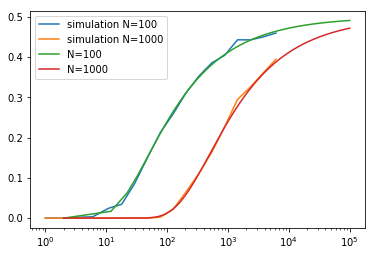

In [12]:
n = 100
m = 10000

print(m)

#num = np.array([1,2,3,4,5,6,7,8,9,10,25,50,100,200,400,500,750,1000,5000,10000])
num = np.logspace(0,4,num=20,base=10,dtype=int)
num = num[1:-1] # remove the extra 1

repeat = 100

error_prob_sim = np.zeros((len(num),repeat))
for j in range(repeat):
    memory = generate_memories(n,m) # create an m(rows)xn(cols) input of states for the network to remember
    print(j)
    for i in range(len(num)):
        if j>0 and num[i]<800 or j==0: ##only do small networks multiple times
            W = learn_weights(memory, num[i] ) # learns the weights for the first num memories
            error_prob_sim[i,j] = test_network_1(W,memory,num[i],0)
        else:
            error_prob_sim[i,j] = error_prob_sim[i,0]

epn100 = np.average(error_prob_sim, axis = 1)

n = 1000
m = 10000

#num = np.array([1,2,3,4,5,6,7,8,9,10,25,50,100,200,400,500,750,1000,5000,10000])
num = np.logspace(0,4,num=20,base=10,dtype=int)
num = num[1:-1] # remove the extra 1

repeat = 100

error_prob_sim = np.zeros((len(num),repeat))
for j in range(repeat):
    memory = generate_memories(n,m) # create an m(rows)xn(cols) input of states for the network to remember
    print(j)
    for i in range(len(num)):
        if j>0 and num[i]<800 or j==0: ##only do small networks multiple times
            W = learn_weights(memory, num[i] ) # learns the weights for the first num memories
            error_prob_sim[i,j] = test_network_1(W,memory,num[i],0)
        else:
            error_prob_sim[i,j] = error_prob_sim[i,0]

epn1000 = np.average(error_prob_sim, axis = 1)







plt.plot(num,epn100[:],label = 'simulation N=100')
plt.plot(num,epn1000[:],label = 'simulation N=1000')
N1 = 100 # number of neurons 
N2=1000
Ms = np.linspace(2,100000,10000)

mean1 = (N1-1)/8 # +-
var1 = (Ms-1)*(N1-1)/32 
mean2 = (N2-1)/8
var2 = (Ms-1)*(N2-1)/32

#print(var)

error_prob = np.zeros((len(Ms),2))

for i in range(len(var1)):
    error_prob[i,0] = norm.cdf(-mean1/np.sqrt(var1[i]) )
    error_prob[i,1] = norm.cdf(-mean2/np.sqrt(var2[i]) )
plt.plot(Ms,error_prob[:,0],label = 'N=100')
plt.plot(Ms,error_prob[:,1],label = 'N=1000')
plt.legend() 
plt.xscale('log')
plt.show()
#print(error_prob_sim)

10000
0
1
2
3
4
5
6
7
8
9


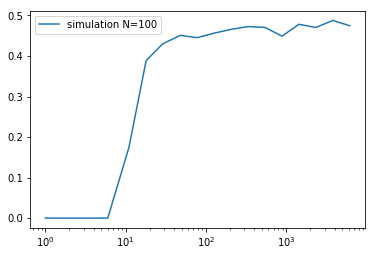

In [9]:
# in a hopfield network all nodes are connected together with weights, a node is not connected back into itself 
# asycronous update
#Initialization of the Hopfield Networks is done by setting the values of the units to the desired start pattern.
#Repeated updates are then performed until the network converges to an attractor pattern.

#Training a Hopfield net involves lowering the energy of states that the net should "remember". This allows the 
#net to serve as a content addressable memory system, that is to say, the network will converge to a "remembered" 
#state if it is given only part of the state. The net can be used to recover from a distorted input to the trained state
#that is most similar to that input. This is called associative memory because it recovers memories on the basis of similarity.


n = 100
m = 10000

print(m)

#num = np.array([1,2,3,4,5,6,7,8,9,10,25,50,100,200,400,500,750,1000,5000,10000])
num = np.logspace(0,4,num=20,base=10,dtype=int)
num = num[1:-1] # remove the extra 1

repeat = 10

error_prob_sim = np.zeros((len(num),repeat))
for j in range(repeat):
    memory = generate_memories(n,m) # create an m(rows)xn(cols) input of states for the network to remember
    print(j)
    for i in range(len(num)):
        if j>0 and num[i]<800 or j==0: ##only do small networks multiple times
            W = learn_weights(memory, num[i] ) # learns the weights for the first num memories
            error_prob_sim[i,j] = test_network(W,memory,num[i],0)
        else:
            error_prob_sim[i,j] = error_prob_sim[i,0]

epn100 = np.average(error_prob_sim, axis = 1)
plt.plot(num,epn100[:],label = 'simulation N=100')

#plt.plot(Ms,error_prob[:,1],label = 'N=1000')
plt.legend() 
plt.xscale('log')
plt.show()
#print(error_prob_sim)


0
1
2
3
4
5
6
7
8
9


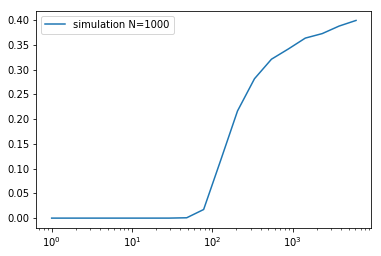

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e

In [16]:
n = 1000
m = 10000


#num = np.array([1,2,3,4,5,6,7,8,9,10,25,50,100,200,400,500,750,1000,5000,10000])
num = np.logspace(0,4,num=20,base=10,dtype=int)
num = num[1:-1] # remove the extra 1

repeat = 10

error_prob_sim = np.zeros((len(num),repeat))
for j in range(repeat):
    memory = generate_memories(n,m) # create an m(rows)xn(cols) input of states for the network to remember
    print(j)
    for i in range(len(num)):
        if j>0 and num[i]<800 or j==0: ##only do small networks multiple times
            W = learn_weights(memory, num[i] ) # learns the weights for the first num memories
            error_prob_sim[i,j] = test_network(W,memory,num[i],0)
        else:
            error_prob_sim[i,j] = error_prob_sim[i,0]

epn1000 = np.average(error_prob_sim, axis = 1)
plt.plot(num,epn1000[:],label = 'simulation N=1000')





plt.legend() 
plt.xscale('log')




plt.show()
print(error_prob_sim)

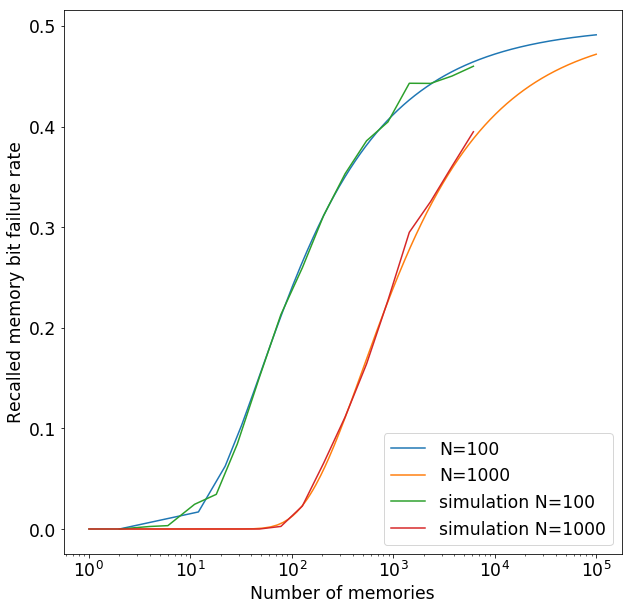

In [15]:
plt.figure(figsize=(10, 10))
plt.plot(Ms,error_prob[:,0],label = 'N=100')
plt.plot(Ms,error_prob[:,1],label = 'N=1000')
plt.plot(num,epn100[:],label = 'simulation N=100')
plt.plot(num,epn1000[:],label = 'simulation N=1000')
plt.legend(loc='lower right')
plt.rc('axes', titlesize='xx-large')  # fontsize of the axes title
plt.rc('axes', labelsize='xx-large')  # fontsize of the x and y labels
plt.rc('xtick', labelsize='xx-large')  # fontsize of the tick labels
plt.rc('ytick', labelsize='xx-large')  # fontsize of the tick labels
plt.rc('legend', fontsize='xx-large')
plt.xlabel('Number of memories')
plt.ylabel('Recalled memory bit failure rate')
plt.xscale('log')
plt.show()

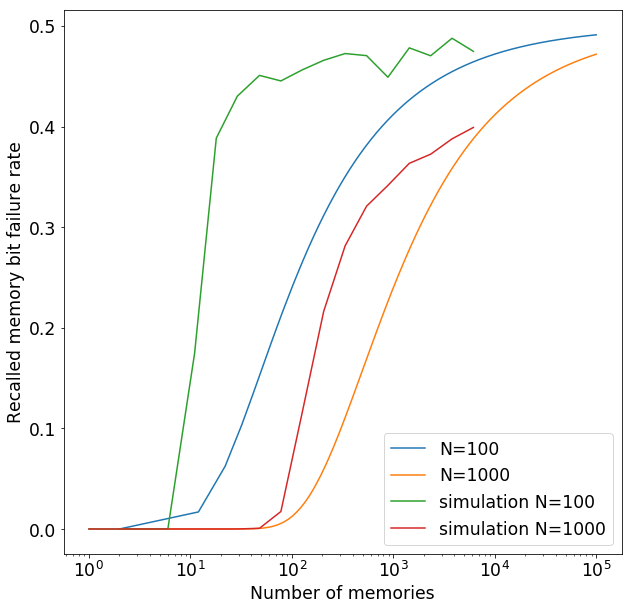

In [23]:
plt.figure(figsize=(10, 10))
plt.plot(Ms,error_prob[:,0],label = 'N=100')
plt.plot(Ms,error_prob[:,1],label = 'N=1000')
plt.plot(num,epn100[:],label = 'simulation N=100')
plt.plot(num,epn1000[:],label = 'simulation N=1000')
plt.legend()
plt.rc('axes', titlesize='xx-large')  # fontsize of the axes title
plt.rc('axes', labelsize='xx-large')  # fontsize of the x and y labels
plt.rc('xtick', labelsize='xx-large')  # fontsize of the tick labels
plt.rc('ytick', labelsize='xx-large')  # fontsize of the tick labels
plt.rc('legend', fontsize='xx-large')
plt.xlabel('Number of memories')
plt.ylabel('Recalled memory bit failure rate')
plt.xscale('log')
plt.show()

In [18]:
ttt = np.logspace(0,3,num=50,base=10,dtype=int)
print(ttt)

[   1    1    1    1    1    2    2    2    3    3    4    4    5    6
    7    8    9   10   12   14   16   19   22   25   29   33   39   44
   51   59   68   79   91  104  120  138  159  184  212  244  281  323
  372  429  494  568  655  754  868 1000]


In [12]:
noises = np.array([0,0.01,0.02, 0.05,0.1,0.2,0.5,0.8,0.9,1])

print('test')
n = 100
m = 1000


#num = np.array([1,2,3,4,5,6,7,8,9,10,25,50,100,200,400,500,750,1000,5000,10000])
num = np.logspace(0,3,num=50,base=10,dtype=int)
#num = num[1:-1] # remove the extra 1

repeat = 10

error_prob_sim_noise = np.zeros((len(num),repeat,len(noises)))
for k in range(len(noises)):
    for j in range(repeat):
        memory = generate_memories(n,m) # create an m(rows)xn(cols) input of states for the network to remember
        print(j)
        for i in range(len(num)):
            if j>0 and num[i]<10000 or j==0: ##only do small networks multiple times
                W = learn_weights(memory, num[i] ) # learns the weights for the first num memories
                error_prob_sim_noise[i,j,k] = test_network(W,memory,num[i],noises[k])
            else:
                error_prob_sim_noise[i,j,k] = error_prob_sim_noise[i,0,k]

epnoises = np.average(error_prob_sim_noise, axis = 1)



test
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


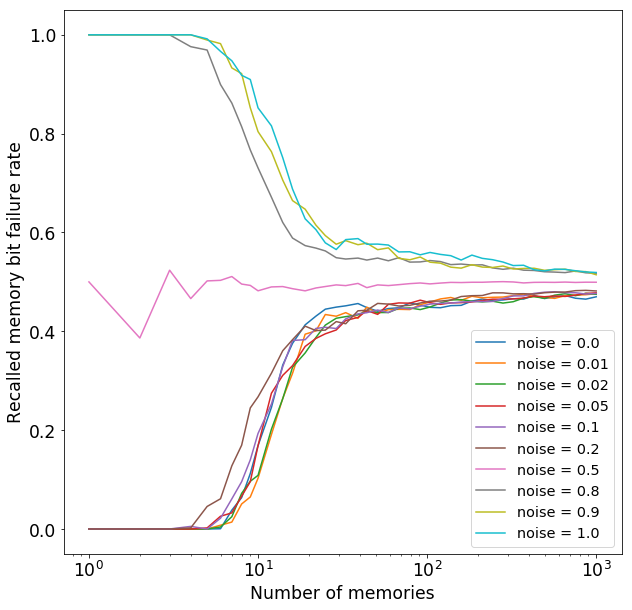

In [34]:
plt.figure(figsize=(10, 10))
plt.rc('axes', titlesize='xx-large')  # fontsize of the axes title
plt.rc('axes', labelsize='xx-large')  # fontsize of the x and y labels
plt.rc('xtick', labelsize='xx-large')  # fontsize of the tick labels
plt.rc('ytick', labelsize='xx-large')  # fontsize of the tick labels
plt.rc('legend', fontsize='x-large')
for k in range(len(noises)): #0,5,8,10,12
    temp1 = epnoises[[0,5,8,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49],k]
    temp2 = num[[0,5,8,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49]]
    #temp1 = np.concatenate([epnoises[0,k],epnoises[5,k],epnoises[8,k],epnoises[10,k]],epnoises[12:,k])
    #print(temp1)
    #temp2 = [num[0],num[5],num[8],num[10],num[12:]]
    #plt.plot(num,epnoises[:,k],label = 'noise = '+str(noises[k]) )
    plt.plot(temp2,temp1,label = 'noise = '+str(noises[k]) )
plt.legend(loc = 'lower right') 
plt.xscale('log')
plt.xlabel('Number of memories')
plt.ylabel('Recalled memory bit failure rate')
plt.show()